*Georg Auer, SPOC lab 8.11.2018*


---


#Aruco Tag Testing
This is the documentation for testing customized Aruco Tags on your webcam.

###**1.)** Tag Generation

The following python script allows the custom Aruco Tag generation. It was used to generate four 4x4 pixel letters.
For the following experiment, take a picture of the generated letters via smartphone and hold it into your webcam.

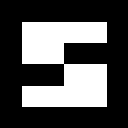

0


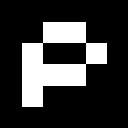

1


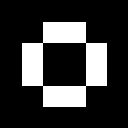

2


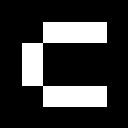

3


In [ ]:
#Program to create custom ArUco dictionary using OpenCV and detect markers using webcam
#original code from: http://www.philipzucker.com/aruco-in-opencv/

import numpy as np
import cv2
import cv2.aruco as aruco
from google.colab.patches import cv2_imshow

#we will not use a built-in dictionary, but we could
#aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)

#define an empty custom dictionary with 
aruco_dict = aruco.custom_dictionary(0, 4, 1)
#add empty bytesList array to fill with 4 markers later, (first 4 next line)
aruco_dict.bytesList = np.empty(shape = (4, 2, 4), dtype = np.uint8)

#add new marker(s)
#each 1 per row represents a white pixel
#new symbols and letters can be painted this way
mybits = np.array([[1,1,1,1],[1,1,0,0],[0,0,1,1],[1,1,1,1]], dtype = np.uint8)
aruco_dict.bytesList[0] = aruco.Dictionary_getByteListFromBits(mybits)
mybits = np.array([[0,1,1,0],[1,0,0,1],[1,1,1,0],[1,0,0,0],], dtype = np.uint8)
aruco_dict.bytesList[1] = aruco.Dictionary_getByteListFromBits(mybits)
mybits = np.array([[0,1,1,0],[1,0,0,1],[1,0,0,1],[0,1,1,0]], dtype = np.uint8)
aruco_dict.bytesList[2] = aruco.Dictionary_getByteListFromBits(mybits)
mybits = np.array([[0,1,1,1],[1,0,0,0],[1,0,0,0],[0,1,1,1]], dtype = np.uint8)
aruco_dict.bytesList[3] = aruco.Dictionary_getByteListFromBits(mybits)

#save marker images for printing
for i in range(len(aruco_dict.bytesList)):
    #cv2.imwrite("custom_aruco_" + str(i) + ".png", aruco.drawMarker(aruco_dict, i, 128))
    cv2_imshow(aruco.drawMarker(aruco_dict, i, 128))
    print(i)


###**2a.)** Recognition of Aruco Tags using Google Colabs


The tags could be identified via webcam. Recognition was only possible if the contrast was high enough. Typically Aruco Tags are b/w. Printing them in 3D in an recognizable output proved difficult. It could only be achieved through manual painting of the tag after 3d printing. Reading Aruco from a smartphone display works well, all customized symbols where identified (id0, id1, id2, id3)

Accessing the webcam via Google Colabs is only possible with the use of [JavaScript](https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=2viqYx97hPMi). It may not be beautiful but it works.

In [ ]:
#This python script, consisting of two parts will take a picture
#and display the captured picture (click capture after starting part 2)
#In the captured picture, the customized tags are identified.

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

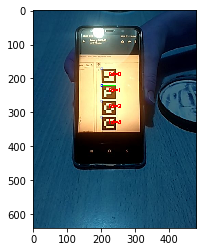

In [ ]:
#This is part two of the script.
#Start, allow your camera access, show tags to the camera and press capture

from IPython.display import Image
try:
  filename = take_photo()
  #print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  #frame = display(Image(filename))

  frame = cv2.imread(filename)

  #ARUCO-part---------------------------
  #lists of ids and the corners belonging to each id
  corners, ids, rejectedImgPoints = aruco.detectMarkers(frame, aruco_dict)
  # draw markers on frame
  frame = aruco.drawDetectedMarkers(frame, corners, ids)
  #ARUCO-part---------------------------

  #matplotlib is used to display the modified image
  #"%matplotlib" inline is just for displaying in jupyter notebooks
  %matplotlib inline 
  from matplotlib import pyplot as plt
  plt.imshow(frame, interpolation='nearest')
  plt.show()
  

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

###**2b.)** Recognition of Aruco Tags using a Python3 installation with the [opencv](https://pypi.org/project/opencv-python/) library works very well. Tag recognition is shown in live video instead of captured frames only.

In [ ]:
#This code can be used with python3 and cv2
#to identify custom Aruco codes in connection with part 1
#It will not run in colab but is shorter and easy to understand
import cv2
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    #lists of ids and the corners belonging to each id
    corners, ids, rejectedImgPoints = aruco.detectMarkers(frame, aruco_dict)
    # draw markers on frame
    frame = aruco.drawDetectedMarkers(frame, corners, ids)
    
    # resize frame to show even on bigger screens
    frame = cv2.resize(frame, None, fx = 3, fy = 3)
    # Display the resulting frame
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()